# Feature selection technique using the Pearson Correlation coefficent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['MEFV'] = data.target

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEFV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [5]:
constant_columns = [column for column in df.columns
                   if column not in df.columns[var_thres.get_support()]]
len(constant_columns)

0

In [6]:
# seems like there are 0 constant columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEFV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
X = df.drop("MEFV",axis=1)
y = df['MEFV']

In [9]:
X.shape


(506, 13)

In [10]:
y.shape

(506,)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.203052,0.394004,-0.059438,0.437684,-0.196545,0.340676,-0.372582,0.625828,0.578899,0.280752,-0.331379,0.464403
ZN,-0.203052,1.000000,-0.534523,-0.024872,-0.527536,0.348199,-0.585812,0.656658,-0.313497,-0.329665,-0.396806,0.171123,-0.428584
INDUS,0.394004,-0.534523,1.000000,0.019945,0.757107,-0.405883,0.635978,-0.699502,0.573361,0.720073,0.390679,-0.342290,0.606026
CHAS,-0.059438,-0.024872,0.019945,1.000000,0.032281,0.107340,0.048548,-0.071933,-0.010475,-0.048810,-0.107799,0.079502,-0.061047
NOX,0.437684,-0.527536,0.757107,0.032281,1.000000,-0.304220,0.743162,-0.774841,0.635081,0.693064,0.199779,-0.384622,0.596475
RM,-0.196545,0.348199,-0.405883,0.107340,-0.304220,1.000000,-0.261999,0.204028,-0.197837,-0.290858,-0.379197,0.140592,-0.620118
AGE,0.340676,-0.585812,0.635978,0.048548,0.743162,-0.261999,1.000000,-0.754547,0.444137,0.504211,0.244094,-0.253652,0.612759
DIS,-0.372582,0.656658,-0.699502,-0.071933,-0.774841,0.204028,-0.754547,1.000000,-0.479621,-0.536082,-0.203303,0.268693,-0.503193
RAD,0.625828,-0.313497,0.573361,-0.010475,0.635081,-0.197837,0.444137,-0.479621,1.000000,0.904438,0.447445,-0.446020,0.480207
TAX,0.578899,-0.329665,0.720073,-0.048810,0.693064,-0.290858,0.504211,-0.536082,0.904438,1.000000,0.453687,-0.436716,0.543012


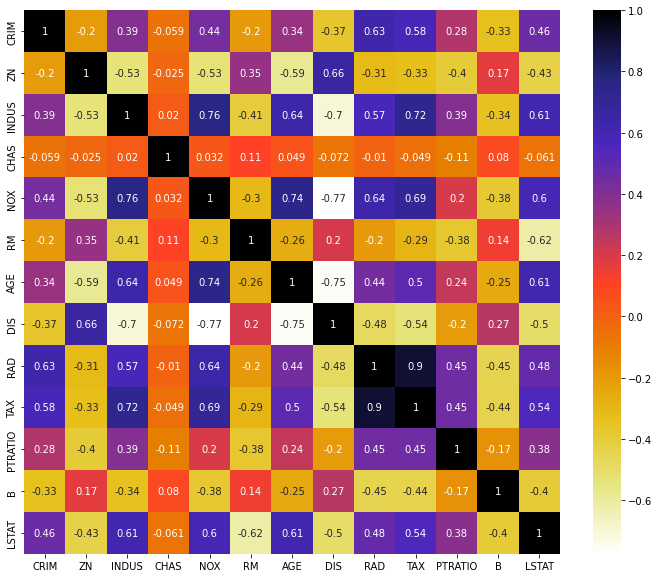

In [13]:
# Pearson Correlation
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()



## Removing the highly correlated variables is one of the major way to reduce the dimension of the data

## The function to determine the highly correlated variables

In [14]:


def correlation(dataset,threshold):
    col_corr = set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

    
    

In [15]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

3

In [16]:
corr_features

{'AGE', 'NOX', 'TAX'}

In [17]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [18]:
X_train.shape

(404, 10)